In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading Data
df=pd.read_csv('Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
#Describing Data
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
#Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
#Cleaning Data
df.isna().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

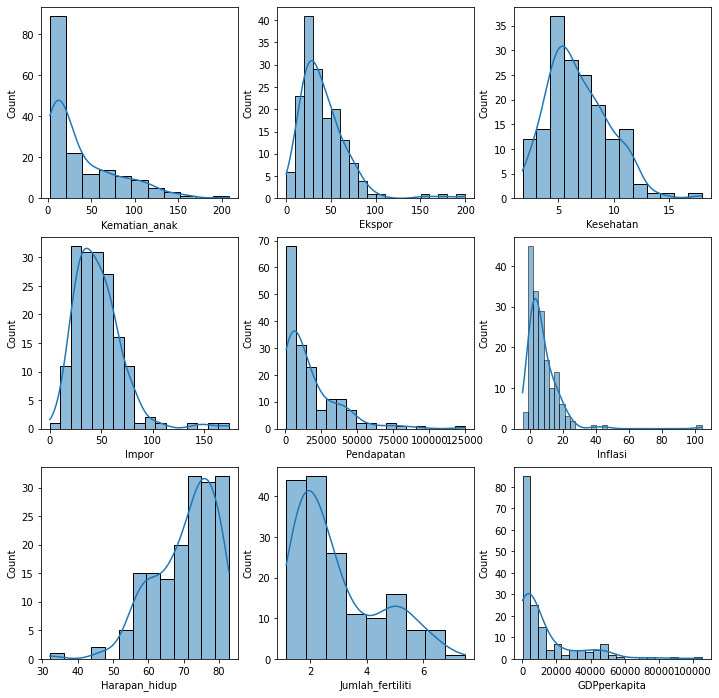

In [ ]:
#Univariate Analysis
fig,pos=plt.subplots(3,3,figsize=(12,12))
sns.histplot(df['Kematian_anak'],kde=True,ax=pos[0][0]);
sns.histplot(df['Ekspor'],kde=True,ax=pos[0][1]);
sns.histplot(df['Kesehatan'],kde=True,ax=pos[0][2]);
sns.histplot(df['Impor'],kde=True,ax=pos[1][0]);
sns.histplot(df['Pendapatan'],kde=True,ax=pos[1][1]);
sns.histplot(df['Inflasi'],kde=True,ax=pos[1][2]);
sns.histplot(df['Harapan_hidup'],kde=True,ax=pos[2][0]);
sns.histplot(df['Jumlah_fertiliti'],kde=True,ax=pos[2][1]);
sns.histplot(df['GDPperkapita'],kde=True,ax=pos[2][2]);

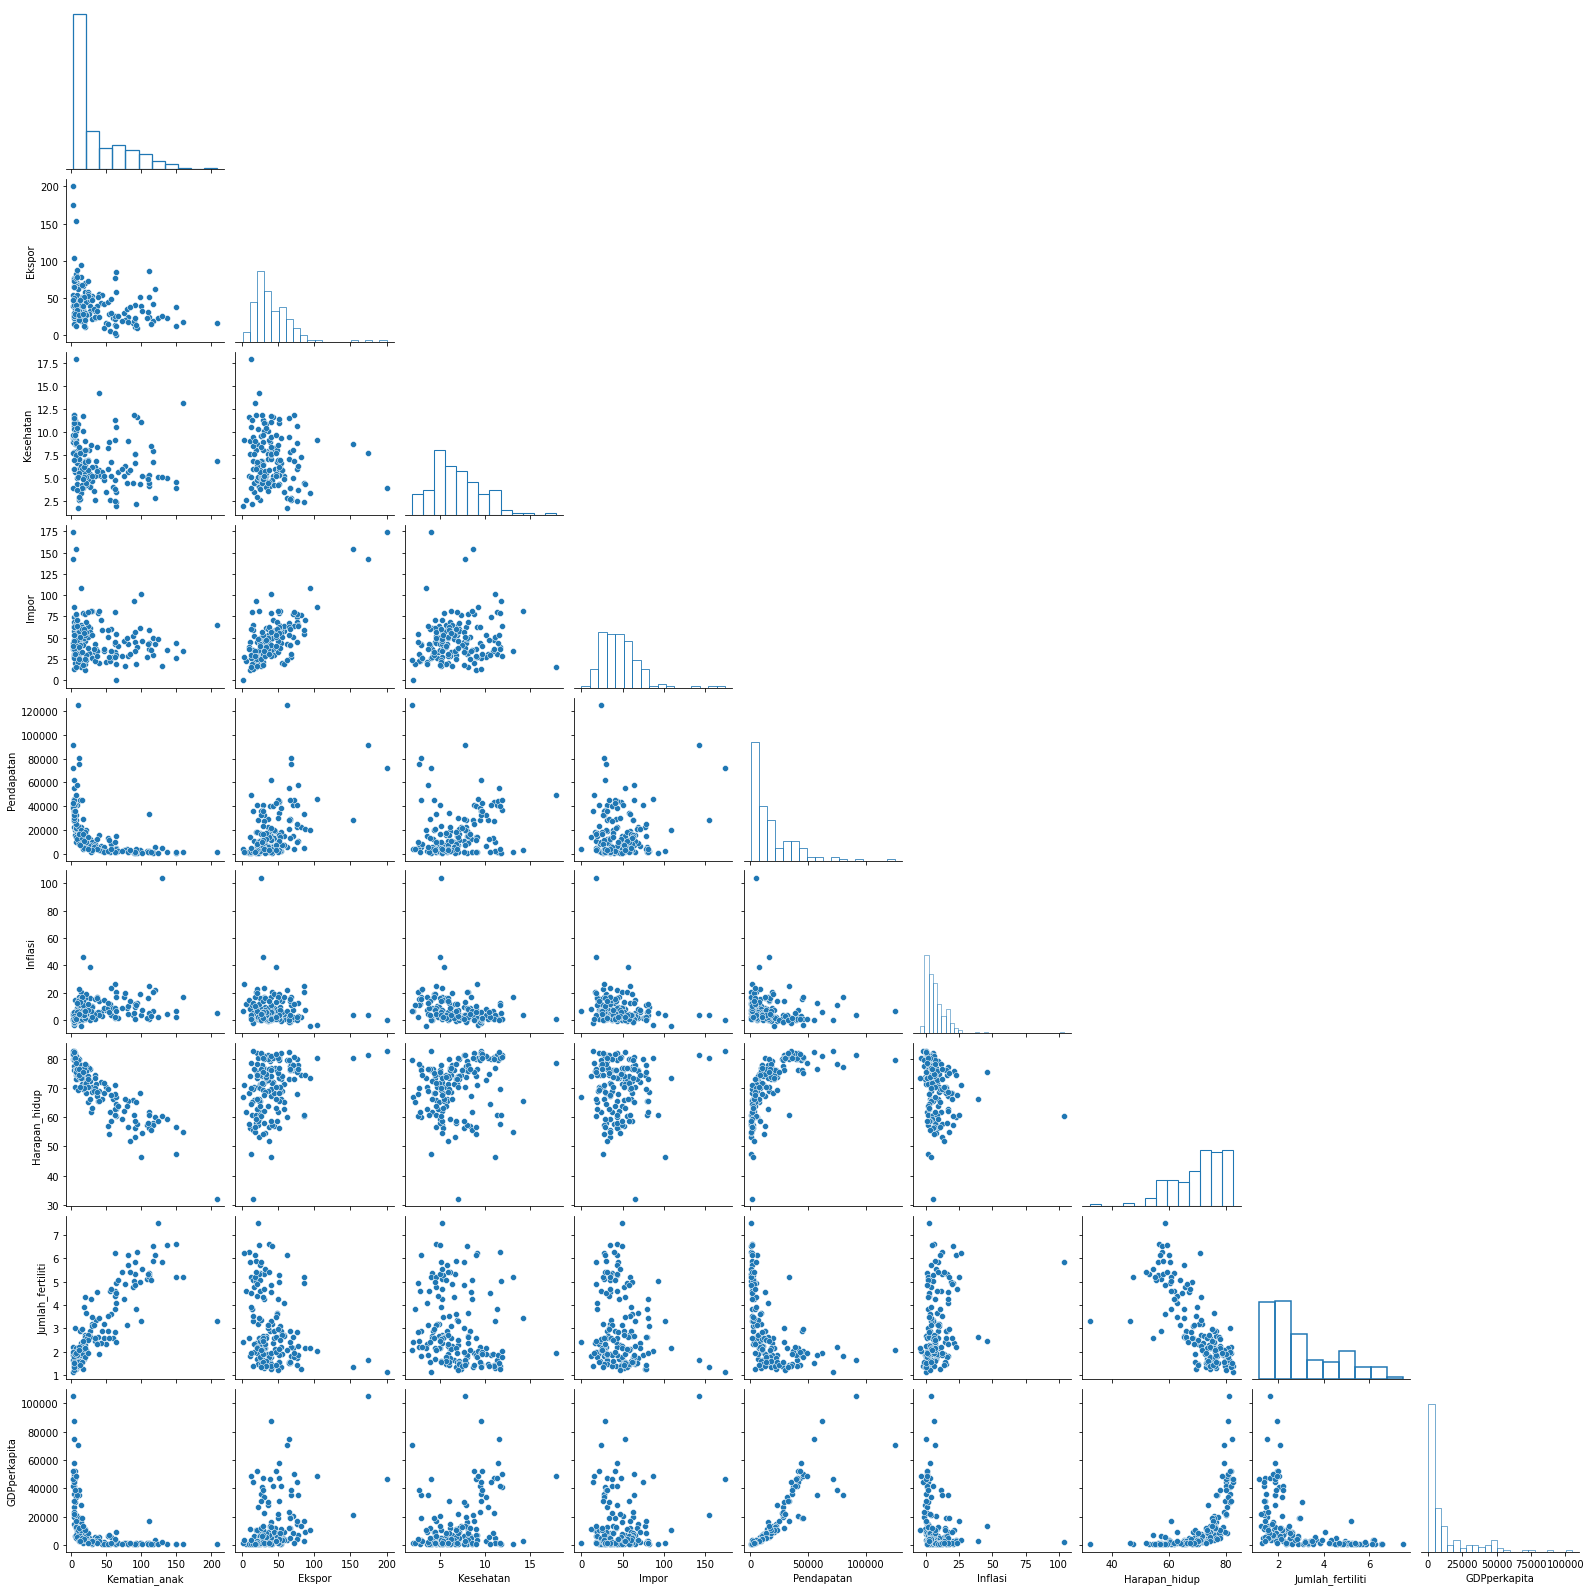

In [ ]:
#Bivariate Analysis
sns.pairplot(df,corner=True,diag_kws=dict(fill=False));

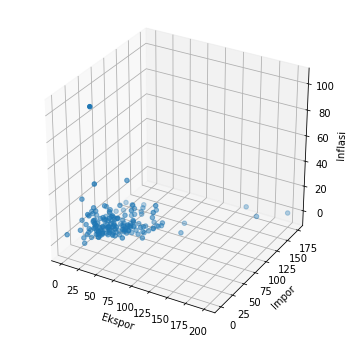

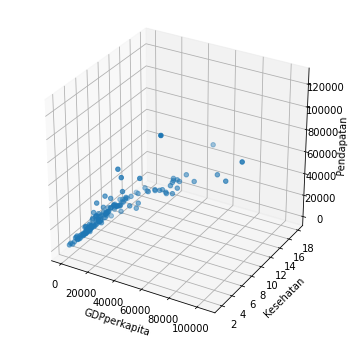

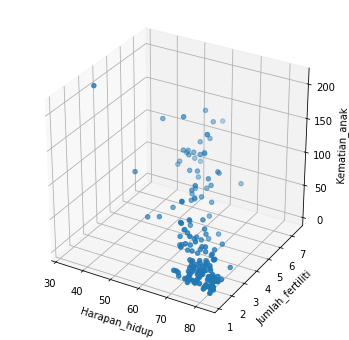

In [ ]:
#Multivariate Analysis
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['Ekspor'],df['Impor'],df['Inflasi'])
plt.xlabel('Ekspor')
plt.ylabel('Impor')
ax.set_zlabel('Inflasi')
plt.show()

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(df['GDPperkapita'],df['Kesehatan'],df['Pendapatan'])
plt.xlabel('GDPperkapita')
plt.ylabel('Kesehatan')
ax.set_zlabel('Pendapatan')
plt.show()

fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['Harapan_hidup'],df['Jumlah_fertiliti'],df['Kematian_anak'])
plt.xlabel('Harapan_hidup')
plt.ylabel('Jumlah_fertiliti')
ax.set_zlabel('Kematian_anak')
plt.show()

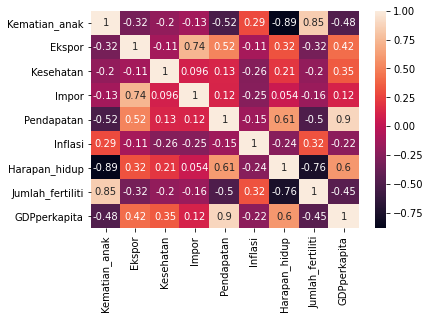

In [ ]:
#Correlation Coefficient Heatmap
sns.heatmap(df.corr(),annot=True,fmt='.2g');

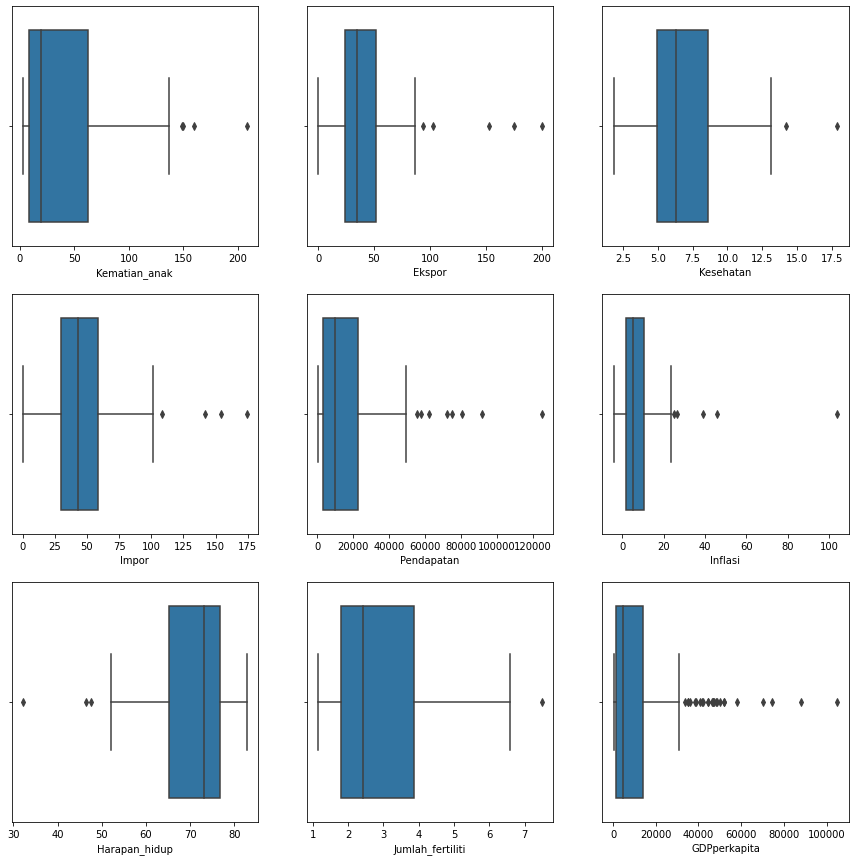

In [ ]:
#Outlier Treatment
fig,pos=plt.subplots(3,3,figsize=(15,15))
sns.boxplot(x=df['Kematian_anak'],ax=pos[0][0]);
sns.boxplot(x=df['Ekspor'],ax=pos[0][1]);
sns.boxplot(x=df['Kesehatan'],ax=pos[0][2]);
sns.boxplot(x=df['Impor'],ax=pos[1][0]);
sns.boxplot(x=df['Pendapatan'],ax=pos[1][1]);
sns.boxplot(x=df['Inflasi'],ax=pos[1][2]);
sns.boxplot(x=df['Harapan_hidup'],ax=pos[2][0]);
sns.boxplot(x=df['Jumlah_fertiliti'],ax=pos[2][1]);
sns.boxplot(x=df['GDPperkapita'],ax=pos[2][2]);

In [ ]:
def finding_outlier(df):
  Q1=df.quantile(0.25)
  Q3=df.quantile(0.75)
  IQR=Q3-Q1
  df_outlier=df[(df<(Q1-(1.5*IQR)))|(df>(Q3+(1.5*IQR)))]
  return df_outlier

print(finding_outlier(df['Kematian_anak']))
print(finding_outlier(df['Ekspor']))
print(finding_outlier(df['Kesehatan']))
print(finding_outlier(df['Impor']))
print(finding_outlier(df['Pendapatan']))
print(finding_outlier(df['Inflasi']))
print(finding_outlier(df['Harapan_hidup']))
print(finding_outlier(df['Jumlah_fertiliti']))
print(finding_outlier(df['GDPperkapita']))

31     149.0
32     150.0
66     208.0
132    160.0
Name: Kematian_anak, dtype: float64
73     103.0
91     175.0
98     153.0
131     93.8
133    200.0
Name: Ekspor, dtype: float64
101    14.2
159    17.9
Name: Kesehatan, dtype: float64
91     142.0
98     154.0
131    108.0
133    174.0
Name: Impor, dtype: float64
23      80600
82      75200
91      91700
114     62300
123    125000
133     72100
145     55500
157     57600
Name: Pendapatan, dtype: int64
49      24.9
103     39.2
113    104.0
149     26.5
163     45.9
Name: Inflasi, dtype: float64
31    47.5
66    32.1
87    46.5
Name: Harapan_hidup, dtype: float64
112    7.49
Name: Jumlah_fertiliti, dtype: float64
7       51900
8       46900
15      44400
23      35300
29      47400
44      58000
53      46200
54      40600
58      41800
68      41900
73      48700
75      35800
77      44500
82      38500
91     105000
110     50300
111     33700
114     87800
123     70300
133     46600
144     52100
145     74600
157     35000
15

In [ ]:
def remove_outlier(df):
  Q1=df.quantile(0.25)
  Q3=df.quantile(0.75)
  IQR=Q3-Q1
  df_noutlier=df[~((df<(Q1-(1.5*IQR)))|(df>(Q3+(1.5*IQR))))]
  return df_noutlier

df1=remove_outlier(df[['Negara','Kematian_anak','Ekspor','Kesehatan','Impor','Pendapatan','Inflasi','Harapan_hidup','Jumlah_fertiliti','GDPperkapita']])
df1.dropna(axis=0,inplace=True)
print(finding_outlier(df1['Kematian_anak']))
print(finding_outlier(df1['Ekspor']))
print(finding_outlier(df1['Kesehatan']))
print(finding_outlier(df1['Impor']))
print(finding_outlier(df1['Pendapatan']))
print(finding_outlier(df1['Inflasi']))
print(finding_outlier(df1['Harapan_hidup']))
print(finding_outlier(df1['Jumlah_fertiliti']))
print(finding_outlier(df1['GDPperkapita']))

Series([], Name: Kematian_anak, dtype: float64)
Series([], Name: Ekspor, dtype: float64)
Series([], Name: Kesehatan, dtype: float64)
Series([], Name: Impor, dtype: float64)
11     41100.0
115    45300.0
128    45400.0
Name: Pendapatan, dtype: float64
Series([], Name: Inflasi, dtype: float64)
Series([], Name: Harapan_hidup, dtype: float64)
Series([], Name: Jumlah_fertiliti, dtype: float64)
10     28000.0
11     20700.0
42     30800.0
43     19800.0
60     26900.0
74     30600.0
115    19300.0
122    22500.0
128    19300.0
135    23400.0
138    22100.0
139    30700.0
Name: GDPperkapita, dtype: float64


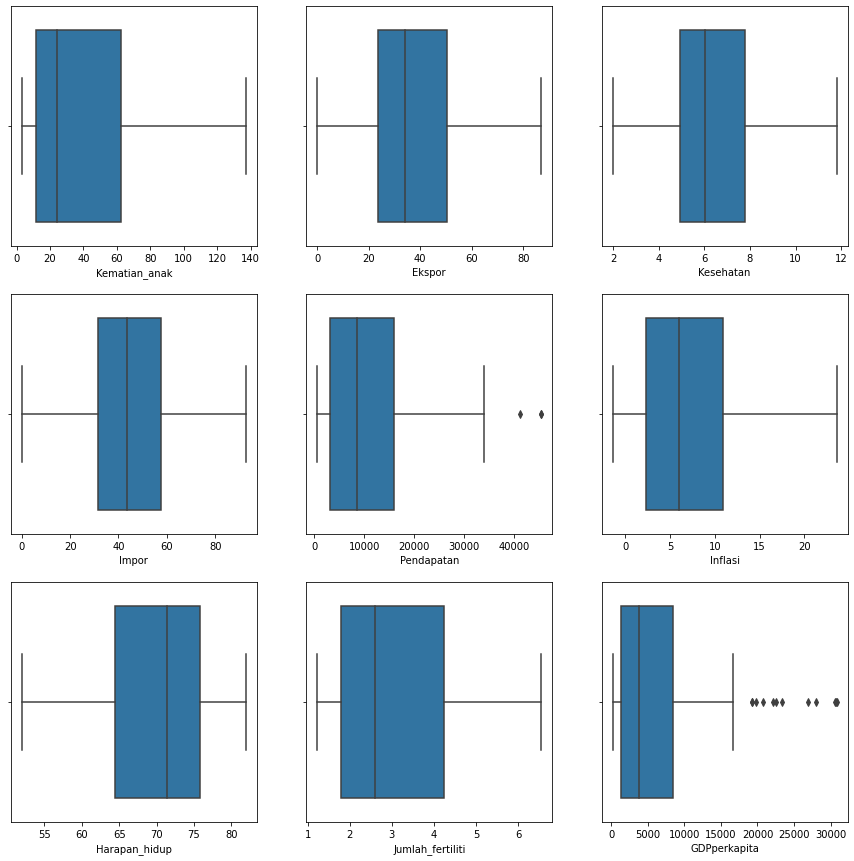

In [ ]:
fig,pos=plt.subplots(3,3,figsize=(15,15))
sns.boxplot(x=df1['Kematian_anak'],ax=pos[0][0]);
sns.boxplot(x=df1['Ekspor'],ax=pos[0][1]);
sns.boxplot(x=df1['Kesehatan'],ax=pos[0][2]);
sns.boxplot(x=df1['Impor'],ax=pos[1][0]);
sns.boxplot(x=df1['Pendapatan'],ax=pos[1][1]);
sns.boxplot(x=df1['Inflasi'],ax=pos[1][2]);
sns.boxplot(x=df1['Harapan_hidup'],ax=pos[2][0]);
sns.boxplot(x=df1['Jumlah_fertiliti'],ax=pos[2][1]);
sns.boxplot(x=df1['GDPperkapita'],ax=pos[2][2]);

In [ ]:
#Scaling Data
num_cols=df1.columns[df1.dtypes.apply(lambda c:np.issubdtype(c,np.number))]

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1[num_cols]=sc.fit_transform(df1[num_cols])

#Clustering Using K-Means
from sklearn.cluster import KMeans
kmeans1=KMeans(n_clusters=2,random_state=42).fit(df1[num_cols])
labels1=kmeans1.labels_
labels1

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int32)

In [ ]:
df1['label1_kmeans']=labels1
df1=df1.set_index('Negara')
df1

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans
Negara,,,,,,,,,,
Afghanistan,1.519326,-1.465026,0.560239,-0.012828,-0.979797,0.343115,-1.828627,1.917030,-0.825561,0
Albania,-0.656174,-0.503559,0.092995,0.196191,-0.125286,-0.465551,0.895099,-0.938772,-0.328385,1
Algeria,-0.339899,0.051955,-0.986655,-0.775465,0.179750,1.431138,0.922200,-0.089565,-0.276376,1
Angola,2.370608,1.328569,-1.585453,-0.125811,-0.539189,2.460348,-1.300143,2.149878,-0.407101,0
Antigua and Barbuda,-0.842392,0.431200,-0.142895,0.778055,0.816525,-0.963819,0.962853,-0.610047,0.811593,1
...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,-0.073873,-0.305925,-0.242695,-0.939291,-0.709681,1.496484,-0.121217,-0.466229,-0.709315,0
Vanuatu,-0.283738,0.489956,-0.496730,0.427807,-0.842171,-0.771047,-0.907167,0.328190,-0.485817,0
Vietnam,-0.458132,1.846693,0.224549,1.981328,-0.684004,0.777671,0.461471,-0.733319,-0.719154,1


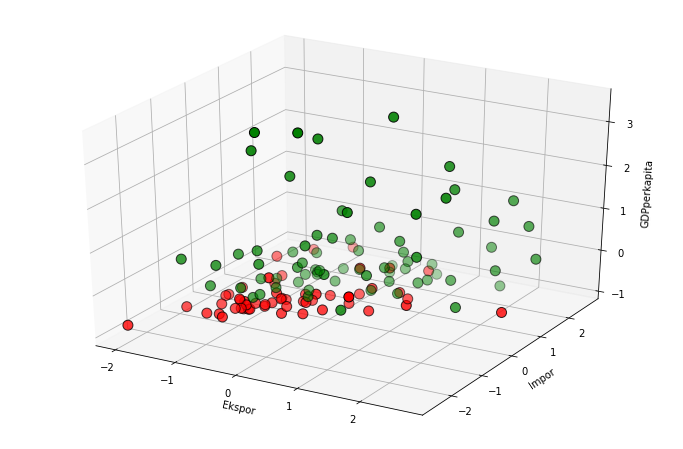

In [ ]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df1['Ekspor'][df1.label1_kmeans==0],df1['Impor'][df1.label1_kmeans==0],df1['GDPperkapita'][df1.label1_kmeans==0],c='red',s=100,edgecolor='black')
ax.scatter(df1['Ekspor'][df1.label1_kmeans==1],df1['Impor'][df1.label1_kmeans==1],df1['GDPperkapita'][df1.label1_kmeans==1],c='green',s=100,edgecolor='black')
plt.xlabel('Ekspor')
plt.ylabel('Impor')
ax.set_zlabel('GDPperkapita')
plt.show()

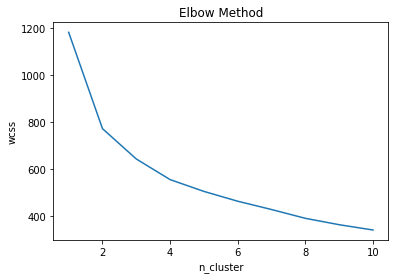

In [ ]:
#Elbow Method
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state= 42)
  kmeans.fit(df1)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('n_cluster')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeans2=KMeans(n_clusters=3,random_state=42).fit(df1)
labels2=kmeans2.labels_
labels2

array([1, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1,
       1, 2, 1, 2, 0, 2, 2, 1, 1, 1, 2, 1, 0, 0, 0, 2, 2, 2, 2, 1, 0, 2,
       1, 1, 2, 1, 0, 2, 2, 1, 1, 2, 0, 1, 2, 2, 1, 0, 2, 2, 2, 1, 1, 2,
       1, 0, 0, 1, 0, 0, 2, 1, 1, 0, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0,
       1, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 2,
       1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1], dtype=int32)

In [ ]:
df1['label2_kmeans']=labels2
df1

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans
Negara,,,,,,,,,,,
Afghanistan,1.519326,-1.465026,0.560239,-0.012828,-0.979797,0.343115,-1.828627,1.917030,-0.825561,0,1
Albania,-0.656174,-0.503559,0.092995,0.196191,-0.125286,-0.465551,0.895099,-0.938772,-0.328385,1,2
Algeria,-0.339899,0.051955,-0.986655,-0.775465,0.179750,1.431138,0.922200,-0.089565,-0.276376,1,2
Angola,2.370608,1.328569,-1.585453,-0.125811,-0.539189,2.460348,-1.300143,2.149878,-0.407101,0,1
Antigua and Barbuda,-0.842392,0.431200,-0.142895,0.778055,0.816525,-0.963819,0.962853,-0.610047,0.811593,1,0
...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,-0.073873,-0.305925,-0.242695,-0.939291,-0.709681,1.496484,-0.121217,-0.466229,-0.709315,0,2
Vanuatu,-0.283738,0.489956,-0.496730,0.427807,-0.842171,-0.771047,-0.907167,0.328190,-0.485817,0,2
Vietnam,-0.458132,1.846693,0.224549,1.981328,-0.684004,0.777671,0.461471,-0.733319,-0.719154,1,2


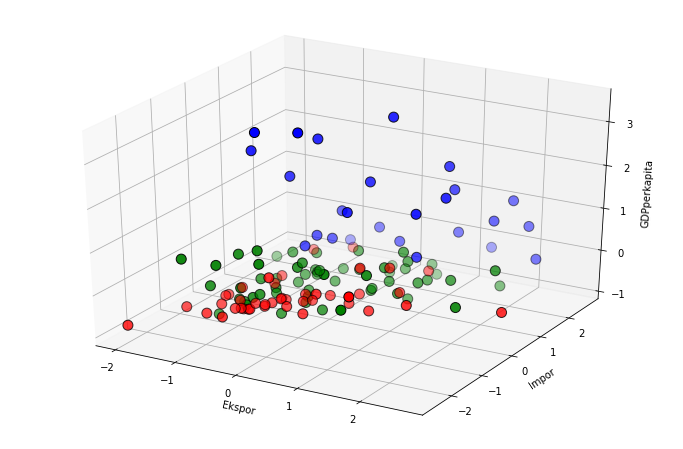

In [ ]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df1['Ekspor'][df1.label2_kmeans==0],df1['Impor'][df1.label2_kmeans==0],df1['GDPperkapita'][df1.label2_kmeans==0],c='blue',s=100,edgecolor='black')
ax.scatter(df1['Ekspor'][df1.label2_kmeans==1],df1['Impor'][df1.label2_kmeans==1],df1['GDPperkapita'][df1.label2_kmeans==1],c='red',s=100,edgecolor='black')
ax.scatter(df1['Ekspor'][df1.label2_kmeans==2],df1['Impor'][df1.label2_kmeans==2],df1['GDPperkapita'][df1.label2_kmeans==2],c='green',s=100,edgecolor='black')
plt.xlabel('Ekspor')
plt.ylabel('Impor')
ax.set_zlabel('GDPperkapita')
plt.show()

In [ ]:
kmeans3=KMeans(n_clusters = 4,random_state=42).fit(df1)
labels3=kmeans3.labels_
labels3

array([1, 0, 2, 1, 3, 2, 2, 2, 3, 3, 2, 3, 0, 0, 1, 0, 2, 0, 1, 2, 0, 1,
       1, 0, 1, 0, 3, 2, 2, 1, 1, 1, 0, 1, 3, 3, 3, 2, 2, 2, 0, 1, 3, 0,
       2, 1, 0, 1, 3, 0, 2, 1, 1, 0, 3, 2, 2, 2, 2, 3, 0, 0, 2, 1, 1, 0,
       1, 3, 3, 1, 3, 3, 0, 1, 1, 3, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 2, 3,
       1, 3, 0, 2, 2, 3, 3, 0, 2, 1, 0, 3, 1, 0, 3, 3, 0, 1, 3, 3, 2, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 1], dtype=int32)

In [ ]:
df1['label3_kmeans']=labels3
df1

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans,label3_kmeans
Negara,,,,,,,,,,,,
Afghanistan,1.519326,-1.465026,0.560239,-0.012828,-0.979797,0.343115,-1.828627,1.917030,-0.825561,0,1,1
Albania,-0.656174,-0.503559,0.092995,0.196191,-0.125286,-0.465551,0.895099,-0.938772,-0.328385,1,2,0
Algeria,-0.339899,0.051955,-0.986655,-0.775465,0.179750,1.431138,0.922200,-0.089565,-0.276376,1,2,2
Angola,2.370608,1.328569,-1.585453,-0.125811,-0.539189,2.460348,-1.300143,2.149878,-0.407101,0,1,1
Antigua and Barbuda,-0.842392,0.431200,-0.142895,0.778055,0.816525,-0.963819,0.962853,-0.610047,0.811593,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,-0.073873,-0.305925,-0.242695,-0.939291,-0.709681,1.496484,-0.121217,-0.466229,-0.709315,0,2,2
Vanuatu,-0.283738,0.489956,-0.496730,0.427807,-0.842171,-0.771047,-0.907167,0.328190,-0.485817,0,2,0
Vietnam,-0.458132,1.846693,0.224549,1.981328,-0.684004,0.777671,0.461471,-0.733319,-0.719154,1,2,0


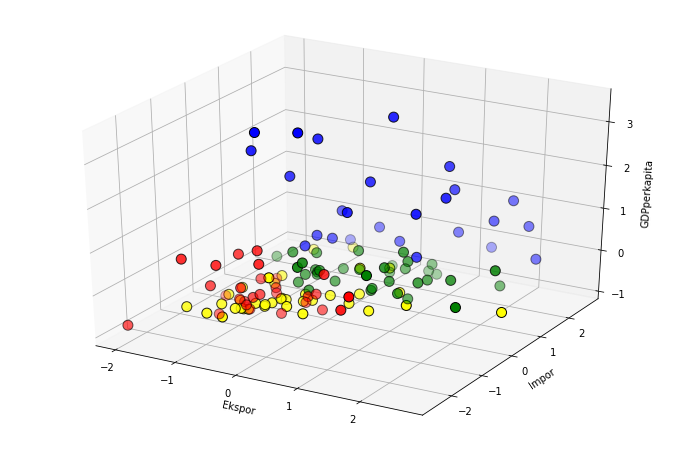

In [ ]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df1['Ekspor'][df1.label3_kmeans==0],df1['Impor'][df1.label3_kmeans==0],df1['GDPperkapita'][df1.label3_kmeans==0],c='green',s=100,edgecolor='black')
ax.scatter(df1['Ekspor'][df1.label3_kmeans==1],df1['Impor'][df1.label3_kmeans==1],df1['GDPperkapita'][df1.label3_kmeans==1],c='yellow',s=100,edgecolor='black')
ax.scatter(df1['Ekspor'][df1.label3_kmeans==2],df1['Impor'][df1.label3_kmeans==2],df1['GDPperkapita'][df1.label3_kmeans==2],c='red',s=100,edgecolor='black')
ax.scatter(df1['Ekspor'][df1.label3_kmeans==3],df1['Impor'][df1.label3_kmeans==3],df1['GDPperkapita'][df1.label3_kmeans==3],c='blue',s=100,edgecolor='black')
plt.xlabel('Ekspor')
plt.ylabel('Impor')
ax.set_zlabel('GDPperkapita')
plt.show()

In [ ]:
#Silhouette Score
from sklearn.metrics import silhouette_score
print('n_clusters = 2,','silhouette_score =',silhouette_score(df1,labels=labels1))
print('n_clusters = 3,','silhouette_score =',silhouette_score(df1,labels=labels2))
print('n_clusters = 4,','silhouette_score =',silhouette_score(df1,labels=labels3))

n_clusters = 2, silhouette_score = 0.25756191183342736
n_clusters = 3, silhouette_score = 0.3100786195771439
n_clusters = 4, silhouette_score = 0.3244012144077577


In [ ]:
df2=df1[(df1['label2_kmeans']==1)]
df2

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,label1_kmeans,label2_kmeans,label3_kmeans
Negara,,,,,,,,,,,,
Afghanistan,1.519326,-1.465026,0.560239,-0.012828,-0.979797,0.343115,-1.828627,1.917030,-0.825561,0,1,1
Angola,2.370608,1.328569,-1.585453,-0.125811,-0.539189,2.460348,-1.300143,2.149878,-0.407101,0,1,1
Benin,2.134141,-0.727902,-1.018410,-0.447814,-0.958228,-1.054488,-1.069778,1.602002,-0.796746,0,1,1
Botswana,0.404973,0.329712,0.886856,0.348719,0.220832,0.258164,-1.706669,-0.096413,-0.010709,0,1,1
Burkina Faso,2.281933,-0.973610,0.179186,-0.877150,-0.998284,-0.086540,-1.598262,1.951273,-0.822469,0,1,1
Burundi,1.619824,-1.522714,2.383850,-0.334830,-1.066686,0.810344,-1.625363,2.218362,-0.870823,0,1,1
Cameroon,2.045465,-0.813365,-0.551166,-1.024029,-0.871956,-0.887037,-1.679567,1.430791,-0.719154,0,1,1
Comoros,1.460209,-1.117830,-0.832420,0.371315,-1.000338,-0.566838,-0.514192,1.184246,-0.795199,0,1,1
"Congo, Dem. Rep.",2.281933,0.196175,0.709938,0.252683,-1.082605,2.198961,-1.652465,2.410119,-0.856345,0,1,1


In [ ]:
df2=df2.drop(['Ekspor','Impor','GDPperkapita','label1_kmeans','label2_kmeans','label3_kmeans'],axis=1)
df2

,Kematian_anak,Kesehatan,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti
Negara,,,,,,
Afghanistan,1.519326,0.560239,-0.979797,0.343115,-1.828627,1.917030
Angola,2.370608,-1.585453,-0.539189,2.460348,-1.300143,2.149878
Benin,2.134141,-1.018410,-0.958228,-1.054488,-1.069778,1.602002
Botswana,0.404973,0.886856,0.220832,0.258164,-1.706669,-0.096413
Burkina Faso,2.281933,0.179186,-0.998284,-0.086540,-1.598262,1.951273
Burundi,1.619824,2.383850,-1.066686,0.810344,-1.625363,2.218362
Cameroon,2.045465,-0.551166,-0.871956,-0.887037,-1.679567,1.430791
Comoros,1.460209,-0.832420,-1.000338,-0.566838,-0.514192,1.184246
"Congo, Dem. Rep.",2.281933,0.709938,-1.082605,2.198961,-1.652465,2.410119


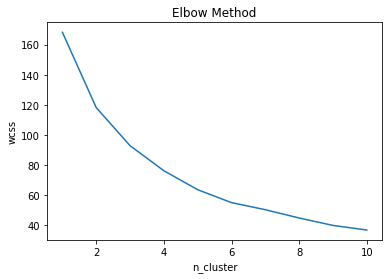

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state= 42)
  kmeans.fit(df2)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('n_cluster')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeans1=KMeans(n_clusters=2,random_state=42).fit(df2)
labels1=kmeans1.labels_
labels1

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1],
      dtype=int32)

In [ ]:
df2['label1_kmeans']=labels1
df2

,Kematian_anak,Kesehatan,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,label1_kmeans
Negara,,,,,,,
Afghanistan,1.519326,0.560239,-0.979797,0.343115,-1.828627,1.917030,1
Angola,2.370608,-1.585453,-0.539189,2.460348,-1.300143,2.149878,0
Benin,2.134141,-1.018410,-0.958228,-1.054488,-1.069778,1.602002,1
Botswana,0.404973,0.886856,0.220832,0.258164,-1.706669,-0.096413,1
Burkina Faso,2.281933,0.179186,-0.998284,-0.086540,-1.598262,1.951273,1
Burundi,1.619824,2.383850,-1.066686,0.810344,-1.625363,2.218362,1
Cameroon,2.045465,-0.551166,-0.871956,-0.887037,-1.679567,1.430791,1
Comoros,1.460209,-0.832420,-1.000338,-0.566838,-0.514192,1.184246,1
"Congo, Dem. Rep.",2.281933,0.709938,-1.082605,2.198961,-1.652465,2.410119,1


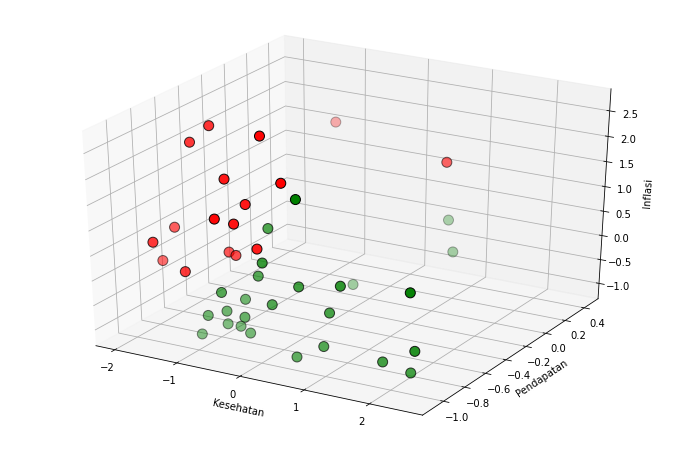

In [ ]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df2['Kesehatan'][df2.label1_kmeans==0],df2['Pendapatan'][df2.label1_kmeans==0],df2['Inflasi'][df2.label1_kmeans==0],c='red',s=100,edgecolor='black')
ax.scatter(df2['Kesehatan'][df2.label1_kmeans==1],df2['Pendapatan'][df2.label1_kmeans==1],df2['Inflasi'][df2.label1_kmeans==1],c='green',s=100,edgecolor='black')
plt.xlabel('Kesehatan')
plt.ylabel('Pendapatan')
ax.set_zlabel('Inflasi')
plt.show()

In [ ]:
kmeans2=KMeans(n_clusters=3,random_state=42).fit(df2)
labels2=kmeans2.labels_
labels2

array([1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 0,
       2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 1, 1, 0, 1],
      dtype=int32)

In [ ]:
df2['label2_kmeans']=labels2
df2

,Kematian_anak,Kesehatan,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,label1_kmeans,label2_kmeans
Negara,,,,,,,,
Afghanistan,1.519326,0.560239,-0.979797,0.343115,-1.828627,1.917030,1,1
Angola,2.370608,-1.585453,-0.539189,2.460348,-1.300143,2.149878,0,0
Benin,2.134141,-1.018410,-0.958228,-1.054488,-1.069778,1.602002,1,1
Botswana,0.404973,0.886856,0.220832,0.258164,-1.706669,-0.096413,1,2
Burkina Faso,2.281933,0.179186,-0.998284,-0.086540,-1.598262,1.951273,1,1
Burundi,1.619824,2.383850,-1.066686,0.810344,-1.625363,2.218362,1,2
Cameroon,2.045465,-0.551166,-0.871956,-0.887037,-1.679567,1.430791,1,1
Comoros,1.460209,-0.832420,-1.000338,-0.566838,-0.514192,1.184246,1,1
"Congo, Dem. Rep.",2.281933,0.709938,-1.082605,2.198961,-1.652465,2.410119,1,1


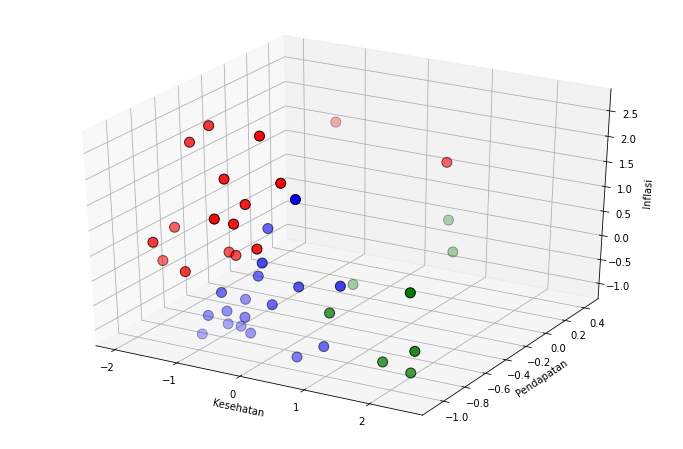

In [ ]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df2['Kesehatan'][df2.label2_kmeans==0],df2['Pendapatan'][df2.label2_kmeans==0],df2['Inflasi'][df2.label2_kmeans==0],c='red',s=100,edgecolor='black')
ax.scatter(df2['Kesehatan'][df2.label2_kmeans==1],df2['Pendapatan'][df2.label2_kmeans==1],df2['Inflasi'][df2.label2_kmeans==1],c='blue',s=100,edgecolor='black')
ax.scatter(df2['Kesehatan'][df2.label2_kmeans==2],df2['Pendapatan'][df2.label2_kmeans==2],df2['Inflasi'][df2.label2_kmeans==2],c='green',s=100,edgecolor='black')
plt.xlabel('Kesehatan')
plt.ylabel('Pendapatan')
ax.set_zlabel('Inflasi')
plt.show()

In [ ]:
kmeans3=KMeans(n_clusters=4,random_state=42).fit(df2)
labels3=kmeans3.labels_
labels3

array([1, 3, 1, 2, 1, 2, 1, 1, 3, 3, 1, 0, 0, 1, 3, 3, 1, 0, 3, 1, 2, 0,
       2, 0, 1, 1, 3, 1, 0, 2, 0, 0, 2, 1, 2, 2, 3, 0, 1, 1, 1, 3, 1],
      dtype=int32)

In [ ]:
df2['label3_kmeans']=labels3
df2

,Kematian_anak,Kesehatan,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,label1_kmeans,label2_kmeans,label3_kmeans
Negara,,,,,,,,,
Afghanistan,1.519326,0.560239,-0.979797,0.343115,-1.828627,1.917030,1,1,1
Angola,2.370608,-1.585453,-0.539189,2.460348,-1.300143,2.149878,0,0,3
Benin,2.134141,-1.018410,-0.958228,-1.054488,-1.069778,1.602002,1,1,1
Botswana,0.404973,0.886856,0.220832,0.258164,-1.706669,-0.096413,1,2,2
Burkina Faso,2.281933,0.179186,-0.998284,-0.086540,-1.598262,1.951273,1,1,1
Burundi,1.619824,2.383850,-1.066686,0.810344,-1.625363,2.218362,1,2,2
Cameroon,2.045465,-0.551166,-0.871956,-0.887037,-1.679567,1.430791,1,1,1
Comoros,1.460209,-0.832420,-1.000338,-0.566838,-0.514192,1.184246,1,1,1
"Congo, Dem. Rep.",2.281933,0.709938,-1.082605,2.198961,-1.652465,2.410119,1,1,3


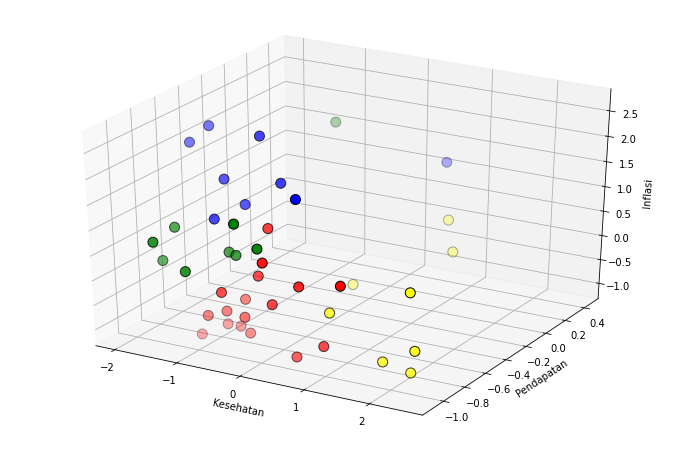

In [ ]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df2['Kesehatan'][df2.label3_kmeans==0],df2['Pendapatan'][df2.label3_kmeans==0],df2['Inflasi'][df2.label3_kmeans==0],c='green',s=100,edgecolor='black')
ax.scatter(df2['Kesehatan'][df2.label3_kmeans==1],df2['Pendapatan'][df2.label3_kmeans==1],df2['Inflasi'][df2.label3_kmeans==1],c='red',s=100,edgecolor='black')
ax.scatter(df2['Kesehatan'][df2.label3_kmeans==2],df2['Pendapatan'][df2.label3_kmeans==2],df2['Inflasi'][df2.label3_kmeans==2],c='yellow',s=100,edgecolor='black')
ax.scatter(df2['Kesehatan'][df2.label3_kmeans==3],df2['Pendapatan'][df2.label3_kmeans==3],df2['Inflasi'][df2.label3_kmeans==3],c='blue',s=100,edgecolor='black')
plt.xlabel('Kesehatan')
plt.ylabel('Pendapatan')
ax.set_zlabel('Inflasi')
plt.show()

In [ ]:
print('n_clusters = 2,','silhouette_score =',silhouette_score(df2,labels=labels1))
print('n_clusters = 3,','silhouette_score =',silhouette_score(df2,labels=labels2))
print('n_clusters = 4,','silhouette_score =',silhouette_score(df2,labels=labels3))

n_clusters = 2, silhouette_score = 0.3079699806376798
n_clusters = 3, silhouette_score = 0.29463952523611436
n_clusters = 4, silhouette_score = 0.4132162253552443


In [ ]:
df3=df2[(df2['label2_kmeans']==0)]
df3

,Kematian_anak,Kesehatan,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,label1_kmeans,label2_kmeans,label3_kmeans
Negara,,,,,,,,,
Angola,2.370608,-1.585453,-0.539189,2.460348,-1.300143,2.149878,0,0,3
"Congo, Rep.",0.741939,-1.762371,-0.612110,2.182625,-1.259490,1.321215,0,0,3
Eritrea,0.484781,-1.671644,-0.999311,0.695987,-1.083329,1.088368,0,0,0
Gabon,0.736028,-1.290591,0.436514,1.512821,-0.920718,0.725400,0,0,0
Ghana,1.061170,-0.510339,-0.830873,1.512821,-1.015574,0.855521,0,0,3
Guinea,2.075024,-0.641893,-1.022933,1.431138,-1.584711,1.588305,0,0,3
India,0.591191,-1.041092,-0.692221,0.267966,-0.473539,-0.288170,0,0,0
Iraq,-0.056138,0.936756,0.159209,1.512821,-0.338031,1.054126,0,0,3
Lao,1.185315,-0.850565,-0.736384,0.303907,-0.798760,0.088495,0,0,0


In [ ]:
df3=df3.drop(['Kesehatan','Pendapatan','Inflasi','label1_kmeans','label2_kmeans','label3_kmeans'],axis=1)
df3

,Kematian_anak,Harapan_hidup,Jumlah_fertiliti
Negara,,,
Angola,2.370608,-1.300143,2.149878
"Congo, Rep.",0.741939,-1.259490,1.321215
Eritrea,0.484781,-1.083329,1.088368
Gabon,0.736028,-0.920718,0.725400
Ghana,1.061170,-1.015574,0.855521
Guinea,2.075024,-1.584711,1.588305
India,0.591191,-0.473539,-0.288170
Iraq,-0.056138,-0.338031,1.054126
Lao,1.185315,-0.798760,0.088495


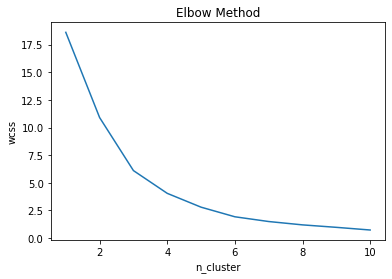

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state= 42)
  kmeans.fit(df3)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('n_cluster')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeans1=KMeans(n_clusters=2,random_state=42).fit(df3)
labels1=kmeans1.labels_
labels1

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
df3['label1_kmeans']=labels1
df3

,Kematian_anak,Harapan_hidup,Jumlah_fertiliti,label1_kmeans
Negara,,,,
Angola,2.370608,-1.300143,2.149878,1
"Congo, Rep.",0.741939,-1.259490,1.321215,0
Eritrea,0.484781,-1.083329,1.088368,0
Gabon,0.736028,-0.920718,0.725400,0
Ghana,1.061170,-1.015574,0.855521,0
Guinea,2.075024,-1.584711,1.588305,1
India,0.591191,-0.473539,-0.288170,0
Iraq,-0.056138,-0.338031,1.054126,0
Lao,1.185315,-0.798760,0.088495,0


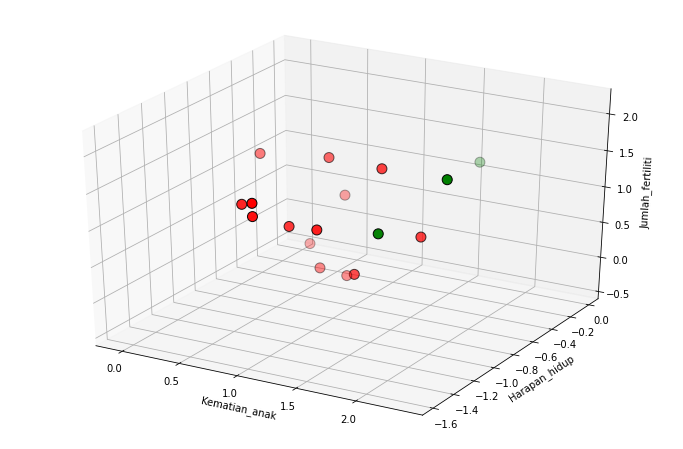

In [ ]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df3['Kematian_anak'][df3.label1_kmeans==0],df3['Harapan_hidup'][df3.label1_kmeans==0],df3['Jumlah_fertiliti'][df3.label1_kmeans==0],c='red',s=100,edgecolor='black')
ax.scatter(df3['Kematian_anak'][df3.label1_kmeans==1],df3['Harapan_hidup'][df3.label1_kmeans==1],df3['Jumlah_fertiliti'][df3.label1_kmeans==1],c='green',s=100,edgecolor='black')
plt.xlabel('Kematian_anak')
plt.ylabel('Harapan_hidup')
ax.set_zlabel('Jumlah_fertiliti')
plt.show()

In [ ]:
kmeans2=KMeans(n_clusters=3,random_state=42).fit(df3)
labels2=kmeans2.labels_
labels2

array([2, 0, 0, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0], dtype=int32)

In [ ]:
df3['label2_kmeans']=labels2
df3

,Kematian_anak,Harapan_hidup,Jumlah_fertiliti,label1_kmeans,label2_kmeans
Negara,,,,,
Angola,2.370608,-1.300143,2.149878,1,2
"Congo, Rep.",0.741939,-1.259490,1.321215,0,0
Eritrea,0.484781,-1.083329,1.088368,0,0
Gabon,0.736028,-0.920718,0.725400,0,0
Ghana,1.061170,-1.015574,0.855521,0,0
Guinea,2.075024,-1.584711,1.588305,1,2
India,0.591191,-0.473539,-0.288170,0,1
Iraq,-0.056138,-0.338031,1.054126,0,0
Lao,1.185315,-0.798760,0.088495,0,1


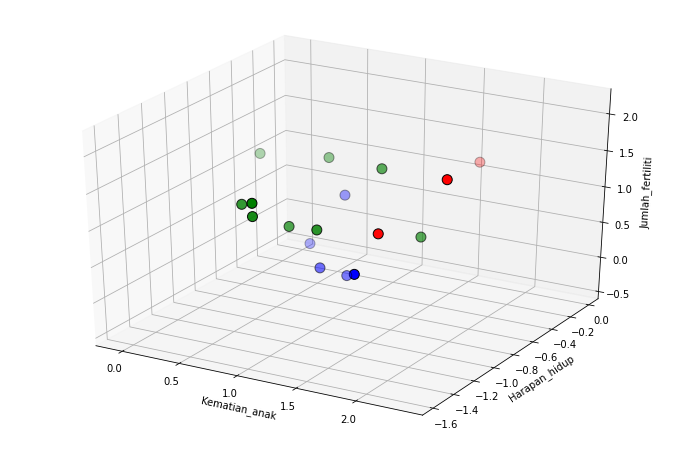

In [ ]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df3['Kematian_anak'][df3.label2_kmeans==0],df3['Harapan_hidup'][df3.label2_kmeans==0],df3['Jumlah_fertiliti'][df3.label2_kmeans==0],c='green',s=100,edgecolor='black')
ax.scatter(df3['Kematian_anak'][df3.label2_kmeans==1],df3['Harapan_hidup'][df3.label2_kmeans==1],df3['Jumlah_fertiliti'][df3.label2_kmeans==1],c='blue',s=100,edgecolor='black')
ax.scatter(df3['Kematian_anak'][df3.label2_kmeans==2],df3['Harapan_hidup'][df3.label2_kmeans==2],df3['Jumlah_fertiliti'][df3.label2_kmeans==2],c='red',s=100,edgecolor='black')
plt.xlabel('Kematian_anak')
plt.ylabel('Harapan_hidup')
ax.set_zlabel('Jumlah_fertiliti')
plt.show()

In [ ]:
kmeans3=KMeans(n_clusters=4,random_state=42).fit(df3)
labels3=kmeans3.labels_
labels3

array([1, 0, 0, 0, 0, 1, 2, 0, 2, 0, 3, 2, 2, 0, 0, 2, 0], dtype=int32)

In [ ]:
df3['label3_kmeans']=labels3
df3

,Kematian_anak,Harapan_hidup,Jumlah_fertiliti,label1_kmeans,label2_kmeans,label3_kmeans
Negara,,,,,,
Angola,2.370608,-1.300143,2.149878,1,2,1
"Congo, Rep.",0.741939,-1.259490,1.321215,0,0,0
Eritrea,0.484781,-1.083329,1.088368,0,0,0
Gabon,0.736028,-0.920718,0.725400,0,0,0
Ghana,1.061170,-1.015574,0.855521,0,0,0
Guinea,2.075024,-1.584711,1.588305,1,2,1
India,0.591191,-0.473539,-0.288170,0,1,2
Iraq,-0.056138,-0.338031,1.054126,0,0,0
Lao,1.185315,-0.798760,0.088495,0,1,2


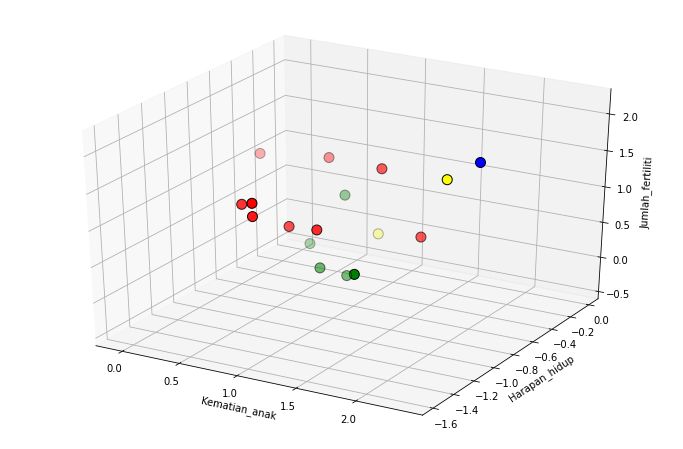

In [ ]:
fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df3['Kematian_anak'][df3.label3_kmeans==0],df3['Harapan_hidup'][df3.label3_kmeans==0],df3['Jumlah_fertiliti'][df3.label3_kmeans==0],c='red',s=100,edgecolor='black')
ax.scatter(df3['Kematian_anak'][df3.label3_kmeans==1],df3['Harapan_hidup'][df3.label3_kmeans==1],df3['Jumlah_fertiliti'][df3.label3_kmeans==1],c='yellow',s=100,edgecolor='black')
ax.scatter(df3['Kematian_anak'][df3.label3_kmeans==2],df3['Harapan_hidup'][df3.label3_kmeans==2],df3['Jumlah_fertiliti'][df3.label3_kmeans==2],c='green',s=100,edgecolor='black')
ax.scatter(df3['Kematian_anak'][df3.label3_kmeans==3],df3['Harapan_hidup'][df3.label3_kmeans==3],df3['Jumlah_fertiliti'][df3.label3_kmeans==3],c='blue',s=100,edgecolor='black')
plt.xlabel('Kematian_anak')
plt.ylabel('Harapan_hidup')
ax.set_zlabel('Jumlah_fertiliti')
plt.show()

In [ ]:
print('n_clusters = 2,','silhouette_score =',silhouette_score(df3,labels=labels1))
print('n_clusters = 3,','silhouette_score =',silhouette_score(df3,labels=labels2))
print('n_clusters = 4,','silhouette_score =',silhouette_score(df3,labels=labels3))

n_clusters = 2, silhouette_score = 0.45744343494765927
n_clusters = 3, silhouette_score = 0.6299905483174113
n_clusters = 4, silhouette_score = 0.6512175524108851


In [ ]:
df4=df3.drop(['Harapan_hidup','Jumlah_fertiliti','Kematian_anak','label1_kmeans','label2_kmeans'],axis=1)
df4.columns=['HELP']
df4.sort_values(by=['HELP'])

,HELP
Negara,
Yemen,0
"Congo, Rep.",0
Eritrea,0
Gabon,0
Ghana,0
Sudan,0
Pakistan,0
Iraq,0
Madagascar,0
